# NLP analysis of SFO's ground crew communication

### Analysis using standard NLP library (SpaCy)
- Picking rows
- Replacing punctuation
- Sentence detection
- Tokens
- Stop words
- Lemmatization
- Word frequency
- Part-of-speech tagging
- Shallow parsing (chunking): Noun phrase detection
- Shallow parsing (chunking): Verb phrase detection
- Named entity resolution

### Visualizations
- Word frequency
- Token frequency
- Noun phrase frequency   (All rows)
- Verb phrase frequency   (Only top 10k rows)
- Named entity resolution (Only top 10k rows)
- Word cloud: All text, Noun phrases, Verb phrases
    
### Manual transcript review
- Creation of custom dictionary
- Creation of alerts
- Creation of dashboards

# Installation & loading libraries

In [1]:
# !pip install spacy

In [2]:
# !pip install textacy

In [3]:
# !pip install wordcloud

In [4]:
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import textacy

2023-02-02 09:29:12.419329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
nlp = spacy.load("en_core_web_sm")
# nlp = spacy.blank('en')

# Reading data

In [6]:
data = pd.read_csv("sfo-talks.csv")  
data.head()

,Unnamed: 0,channel_id,confidence,created,duration,org_id,text,id
0,0,-MZpS5SKLivgnjW5ZGuv,0.596,1620101057999,520,-MZoNTr84nKko1kowO0m,Hey.,-MZpY3qqc1FcG2rMEeRq
1,1,-MZpS5SKLivgnjW5ZGuv,0.820,1620101074197,12320,-MZoNTr84nKko1kowO0m,"So yeah, you're right. I was listening to grou...",-MZpY7nwVzoccHVNK2SH
2,2,-MZpS5SKLivgnjW5ZGuv,0.927,1620101074270,340,-MZoNTr84nKko1kowO0m,Right?,-MZpY7p4YiV4CvqsAhm9
3,3,-MZpS5SKLivgnjW5ZGuv,0.907,1620101089096,9960,-MZoNTr84nKko1kowO0m,"Yeah, but.",-MZpYBRkJptz3N2MPKGJ
4,4,-MZpS5SKLivgnjW5ZGuv,0.850,1620101097948,3290,-MZoNTr84nKko1kowO0m,So you'll get to listen to it.,-MZpYDb2DRw_c7OTiO3Z


In [7]:
data.shape

(1820071, 8)

In [8]:
data['confidence'].describe()

count    1.820071e+06
mean     7.571618e-01
std      2.227604e-01
min      0.000000e+00
25%      6.170000e-01
50%      7.760000e-01
75%      9.690000e-01
max      9.960000e-01
Name: confidence, dtype: float64

# Pre-Processing

### Picking rows
- Memory issues if number of rows exceed 25,000 for noun phrase parsing
- Memory issues if number of rows exceed 10,000 for verb phrase parsing

In [9]:
df = data.iloc[:10000,[6]]   
df.head()

,text
0,Hey.
1,"So yeah, you're right. I was listening to grou..."
2,Right?
3,"Yeah, but."
4,So you'll get to listen to it.


### Replacing punctuation

In [10]:
df['text'] = df['text'].str.replace(",", "")
df['text'] = df['text'].str.replace("?", "")
df['text'] = df['text'].str.replace("'", "")
df['text'] = df['text'].str.replace(".", "")

/var/folders/jr/clx02g4j293g66lhcljqsxjh0000gn/T/ipykernel_26302/2895906255.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace("?", "")
/var/folders/jr/clx02g4j293g66lhcljqsxjh0000gn/T/ipykernel_26302/2895906255.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(".", "")


In [11]:
df['text'] = df['text'].apply(lambda row: ' '.join([word for word in row.split()]))

In [12]:
all_words = '. '.join([text for text in df['text']])
all_words[:20]

'Hey. So yeah youre r'

### Sentence detection

In [13]:
about_text = all_words 

about_doc = nlp(about_text)
sentences = list(about_doc.sents)
print(len(sentences))

counter = 0
for sentence in sentences:
    print(f"{sentence[:5]}")
    counter += 1
    if 20 < counter:
        break

10139
Hey.
So yeah
youre right
I was listening to ground
Right.
Yeah
but.
So youll get to
Oh it only does it
Ah I see.
Yeah.
I see I see.
Wow.
Member sometimes remember there was
Like this go.
How you doing.
Well come over here we
Will talk soon.
It is finally coming coming
Again right now for example
I was actually.


### Tokens

In [14]:
about_doc = nlp(about_text)

counter = 0
for token in about_doc:
    print (token, token.idx)
    counter += 1
    if 20 < counter:
        break    

Hey 0
. 3
So 5
yeah 8
you 13
re 16
right 19
I 25
was 27
listening 31
to 41
ground 44
previously 51
I 62
was 64
listening 68
to 78
ramp 81
and 86
it 90
was 93


In [15]:
counter = 0

for token in about_doc:
    print(
         f"{str(token.text_with_ws):22}"
         f"{str(token.is_alpha):15}"
         f"{str(token.is_punct):18}"
         f"{str(token.is_stop)}"
        )
    counter += 1
    if 20 < counter:
        break    

Hey                   True           False             False
.                     False          True              False
So                    True           False             True
yeah                  True           False             False
you                   True           False             True
re                    True           False             True
right                 True           False             False
I                     True           False             True
was                   True           False             True
listening             True           False             False
to                    True           False             True
ground                True           False             False
previously            True           False             False
I                     True           False             True
was                   True           False             True
listening             True           False             False
to                    True      

### Stop words

In [16]:
about_doc = nlp(about_text)
# print([token for token in about_doc if not token.is_stop])

counter = 0
for token in about_doc:
    if not token.is_stop:
        print (token)
        counter += 1
        
    if 20 < counter:
        break            

Hey
.
yeah
right
listening
ground
previously
listening
ramp
clear
round
right
like
m
trying
understand
m
having
difficult
.
Right


### Lemmatization

In [17]:
about_doc = nlp(about_text)
                      
lemm = []
counter = 0
for token in about_doc:
    lemm.append(str(token.lemma_))

for i in range(20):
    print(lemm[i])

hey
.
so
yeah
you
re
right
I
be
listen
to
ground
previously
I
be
listen
to
ramp
and
it


# Processing

### Word Frequency

In [18]:
complete_doc = nlp(about_text)

words = [
     token.text
     for token in complete_doc
     if not token.is_stop and not token.is_punct
 ]

### Most common words

In [19]:
table_words = pd.DataFrame(columns=['word','frequency'])

table_words.loc[0, 'word']      = Counter(words).most_common(5)[0][0]
table_words.loc[1, 'word']      = Counter(words).most_common(5)[1][0]
table_words.loc[2, 'word']      = Counter(words).most_common(5)[2][0]
table_words.loc[3, 'word']      = Counter(words).most_common(5)[3][0]
table_words.loc[4, 'word']      = Counter(words).most_common(5)[4][0]

table_words.loc[0, 'frequency'] = Counter(words).most_common(5)[0][1]
table_words.loc[1, 'frequency'] = Counter(words).most_common(5)[1][1]
table_words.loc[2, 'frequency'] = Counter(words).most_common(5)[2][1]
table_words.loc[3, 'frequency'] = Counter(words).most_common(5)[3][1]
table_words.loc[4, 'frequency'] = Counter(words).most_common(5)[4][1]

table_words

,word,frequency
0,heavy,460
1,good,452
2,push,434
3,line,385
4,ground,339


[]

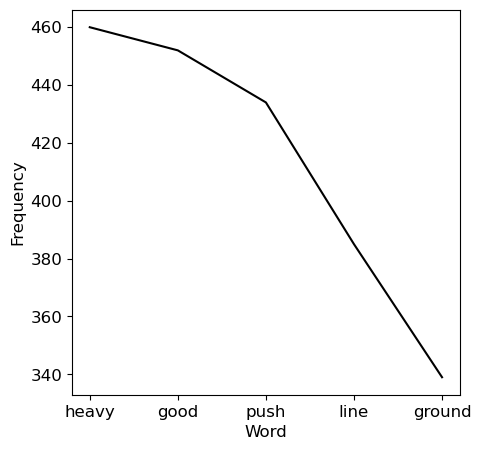

In [20]:
plt.figure(figsize = (5,5))
plt.plot(table_words['word'], table_words['frequency'], color = 'k')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel("Word", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.plot()

### Part-of-Speech Tagging

In [21]:
about_doc = nlp(about_text)

counter = 0
for token in about_doc:
#     print(f"""
#             TOKEN: {str(token)}
#             =====
#             TAG: {str(token.tag_):10} POS: {token.pos_}
#             EXPLANATION: {spacy.explain(token.tag_)}""")

    print(f""" TOKEN: {str(token):10} TAG: {str(token.tag_):5} POS: {(token.pos_):8} EXPLAIN: {spacy.explain(token.tag_)}""")

    counter += 1
    if 20 < counter:
        break

 TOKEN: Hey        TAG: UH    POS: INTJ     EXPLAIN: interjection
 TOKEN: .          TAG: .     POS: PUNCT    EXPLAIN: punctuation mark, sentence closer
 TOKEN: So         TAG: RB    POS: ADV      EXPLAIN: adverb
 TOKEN: yeah       TAG: UH    POS: INTJ     EXPLAIN: interjection
 TOKEN: you        TAG: PRP   POS: PRON     EXPLAIN: pronoun, personal
 TOKEN: re         TAG: VBP   POS: VERB     EXPLAIN: verb, non-3rd person singular present
 TOKEN: right      TAG: JJ    POS: ADJ      EXPLAIN: adjective (English), other noun-modifier (Chinese)
 TOKEN: I          TAG: PRP   POS: PRON     EXPLAIN: pronoun, personal
 TOKEN: was        TAG: VBD   POS: AUX      EXPLAIN: verb, past tense
 TOKEN: listening  TAG: VBG   POS: VERB     EXPLAIN: verb, gerund or present participle
 TOKEN: to         TAG: TO    POS: PART     EXPLAIN: infinitival "to"
 TOKEN: ground     TAG: VB    POS: VERB     EXPLAIN: verb, base form
 TOKEN: previously TAG: RB    POS: ADV      EXPLAIN: adverb
 TOKEN: I          TAG: PRP

In [22]:
adposition = []
adjectives = []
adverb = []
nouns = []
numeral = []
propernoun = []
verb = []

for token in about_doc:
    if token.pos_ == "ADP":
         adposition.append(token)
            
    if token.pos_ == "ADJ":
         adjectives.append(token)
            
    if token.pos_ == "ADV":
         adverb.append(token)
            
    if token.pos_ == "NOUN":
         nouns.append(token)
            
    if token.pos_ == "NUM":
         numeral.append(token)
            
    if token.pos_ == "PROPN":
         propernoun.append(token)            
            
    if token.pos_ == "VERB":
         verb.append(token)                        

In [23]:
table_token = pd.DataFrame(columns=['token','frequency', 'top 5'])

table_token.loc[0, 'token']     = 'Adjectives'
table_token.loc[1, 'token']     = 'Nouns'
table_token.loc[2, 'token']     = 'Numerals'
table_token.loc[3, 'token']     = 'Proper noun'
table_token.loc[4, 'token']     = 'Verb'

table_token.loc[0, 'frequency'] = len(adjectives)
table_token.loc[1, 'frequency'] = len(nouns)
table_token.loc[2, 'frequency'] = len(numeral)
table_token.loc[3, 'frequency'] = len(propernoun)
table_token.loc[4, 'frequency'] = len(verb)

table_token.loc[0, 'top 5']     = adjectives[:5]
table_token.loc[1, 'top 5']     = nouns[:5]
table_token.loc[2, 'top 5']     = numeral[:5]
table_token.loc[3, 'top 5']     = propernoun[:5]
table_token.loc[4, 'top 5']     = verb[:5]

table_token

,token,frequency,top 5
0,Adjectives,3922,"[right, clear, round, difficult, certain]"
1,Nouns,11392,"[ramp, time, example, conversation, cable]"
2,Numerals,6292,"[2, 184, 120, 410, 418]"
3,Proper noun,5993,"[Member, tequila, shot, Amazon, Chase]"
4,Verb,7531,"[re, listening, ground, listening, re]"


[]

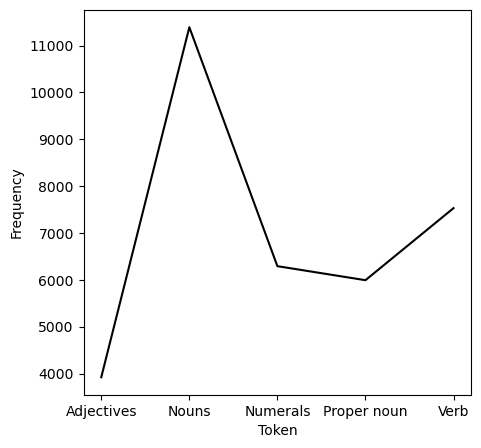

In [24]:
plt.figure(figsize = (5,5))
plt.plot(table_token['token'], table_token['frequency'], color = 'k')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel("Token", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.plot()

# Shallow Parsing (Chunking)

### Noun Phrase Detection

In [25]:
npd_text    = nlp(about_text)
npd_chunks  = npd_text.noun_chunks

In [26]:
noun_chunks = []

for chunk in npd_chunks:
    noun_chunks.append( chunk.text )
    
# noun_chunks

In [27]:
type(noun_chunks[0]), noun_chunks[0], noun_chunks[1], noun_chunks[2], noun_chunks[1]==noun_chunks[2]

(str, 'you', 'I', 'I', True)

### Identifying unique noun phrases

In [28]:
noun_chunks_set = set(noun_chunks)
len(noun_chunks), len(noun_chunks_set)

(15784, 7332)

In [29]:
counter = 0

for noun in noun_chunks_set:
    print(noun)
    counter += 1
    if 20 < counter:
        break

disconnect spark
Message 24 N line
this trip
Stepfather
sound bar
17 Zero 7 ram pressure
026 R follow
Rutherford
adult size
Society
4435 S
3045 Happy Pushback
The secondary side
a 43 rental strikethrough
A2 brothers morning
the heavy outbound party
The fact
the ground truth
Good morning Girls
Apple Tea
one other girl fried fish


### Verb phrase detection

In [30]:
# Very slow on full text, limiting analysis to 10k rows
# vpd_text     = nlp(about_text)

import textacy
vpd_text     = about_text[:10000]

patterns     = [{"POS": "AUX"}, {"POS": "VERB"}]
vpd_doc      = textacy.make_spacy_doc(vpd_text, lang="en_core_web_sm") 

verb_phrases = textacy.extract.token_matches(vpd_doc, patterns=patterns)

### Unique verb phrases

In [31]:
verb_chunks = []

for chunk in verb_phrases:
    verb_chunks.append( str(chunk) )

verb_chunks_set = set(verb_chunks)
len(verb_chunks), len(verb_chunks_set)    

(32, 21)

In [32]:
counter = 0

for verb in verb_chunks_set:
    print(verb)
    counter += 1
    if 20 < counter:
        break

Will talk
m looking
ll get
be playing
m showing
might get
raffle push
was listening
m trying
Will ask
is approved
should start
m having
could start
m pushing
wanna watch
re transmitting
have doing
s calling
re signed
is happening


In [33]:
print("Unique verb phrases")
print("------------")
counter = 0
for verb in verb_chunks_set:
    print( str(verb) )
    counter += 1
    if 20 < counter:
        break

print()
print("Unique noun phrases")
print("------------")
counter = 0
for noun in noun_chunks_set:
    print(noun)    
    counter += 1
    if 20 < counter:
        break

Unique verb phrases
------------
Will talk
m looking
ll get
be playing
m showing
might get
raffle push
was listening
m trying
Will ask
is approved
should start
m having
could start
m pushing
wanna watch
re transmitting
have doing
s calling
re signed
is happening

Unique noun phrases
------------
disconnect spark
Message 24 N line
this trip
Stepfather
sound bar
17 Zero 7 ram pressure
026 R follow
Rutherford
adult size
Society
4435 S
3045 Happy Pushback
The secondary side
a 43 rental strikethrough
A2 brothers morning
the heavy outbound party
The fact
the ground truth
Good morning Girls
Apple Tea
one other girl fried fish


### Visualization

In [34]:
table_parsing = pd.DataFrame(columns=['Parsing','Frequency'])

table_parsing.loc[0, 'Parsing']   = 'Noun phrases'
table_parsing.loc[1, 'Parsing']   = 'Noun phrases (unique)'
table_parsing.loc[2, 'Parsing']   = 'Verb phrases'
table_parsing.loc[3, 'Parsing']   = 'Verb phrases (unique)'

table_parsing.loc[0, 'Frequency'] = len(noun_chunks)
table_parsing.loc[1, 'Frequency'] = len(noun_chunks_set)
table_parsing.loc[2, 'Frequency'] = len(verb_chunks)
table_parsing.loc[3, 'Frequency'] = len(verb_chunks_set)

table_parsing

,Parsing,Frequency
0,Noun phrases,15784
1,Noun phrases (unique),7332
2,Verb phrases,32
3,Verb phrases (unique),21


[]

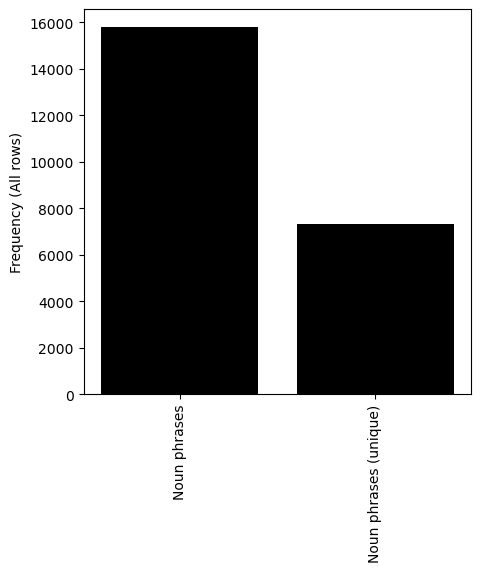

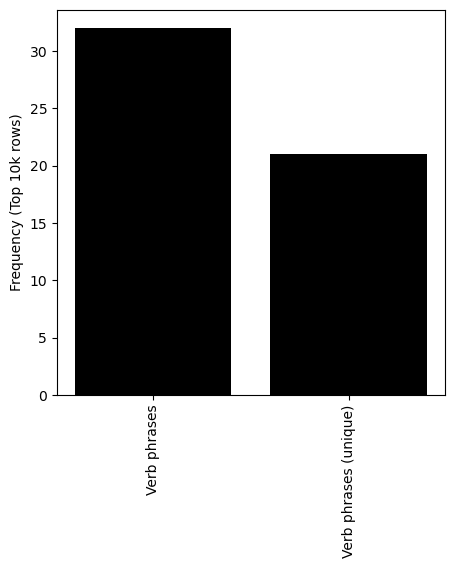

In [35]:
plt.figure(figsize = (5,5))
plt.bar(table_parsing['Parsing'][0:2], table_parsing['Frequency'][0:2], color = 'k')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10, rotation='vertical')
plt.ylabel("Frequency (All rows)", fontsize = 10)
plt.plot()

plt.figure(figsize = (5,5))
plt.bar(table_parsing['Parsing'][2:4], table_parsing['Frequency'][2:4], color = 'k')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10, rotation='vertical')
plt.ylabel("Frequency (Top 10k rows)", fontsize = 10)
plt.plot()

### Named Entity Resolution

In [36]:
nlp         = spacy.load("en_core_web_sm")
ner_text    = nlp(about_text[:10000])

counter = 0
for ent in ner_text.ents:
    print(f"""  {ent.text = } 
                {ent.start_char = } 
                {ent.end_char = } 
                {ent.label_ = } 
                spacy.explain('{ent.label_}') = {spacy.explain(ent.label_)}""")
    counter += 1
    if 10 < counter:
        break

  ent.text = 'Amazon' 
                ent.start_char = 688 
                ent.end_char = 694 
                ent.label_ = 'ORG' 
                spacy.explain('ORG') = Companies, agencies, institutions, etc.
  ent.text = 'Chase' 
                ent.start_char = 776 
                ent.end_char = 781 
                ent.label_ = 'ORG' 
                spacy.explain('ORG') = Companies, agencies, institutions, etc.
  ent.text = 'Channel 2' 
                ent.start_char = 896 
                ent.end_char = 905 
                ent.label_ = 'ORG' 
                spacy.explain('ORG') = Companies, agencies, institutions, etc.
  ent.text = 'Air India 184' 
                ent.start_char = 925 
                ent.end_char = 938 
                ent.label_ = 'ORG' 
                spacy.explain('ORG') = Companies, agencies, institutions, etc.
  ent.text = '120' 
                ent.start_char = 1003 
                ent.end_char = 1006 
                ent.label_ = 'CARDINAL' 
      

In [37]:
from spacy import displacy

def display(x):
    doc = nlp(x)
    print(doc.ents)
    displacy.render(doc, style="ent")
    
# for i in df['text'][50:100]:
#     display(i)
for i in df['text'][50:60]:
    display(i)

(Alphabet,)


(Mexico, 608)


(four,)


(one,)


(3,)


()


/Users/semant/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:211: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


()


()


()


(420, two)


# Visualization: Using displaCy
- If any sentences were to be visualized

In [38]:
from spacy import displacy

about_interest_doc = nlp("There was some heavy contact on point.")
displacy.serve(about_interest_doc, style="dep")

/Users/semant/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:108: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# WordCloud

### All words

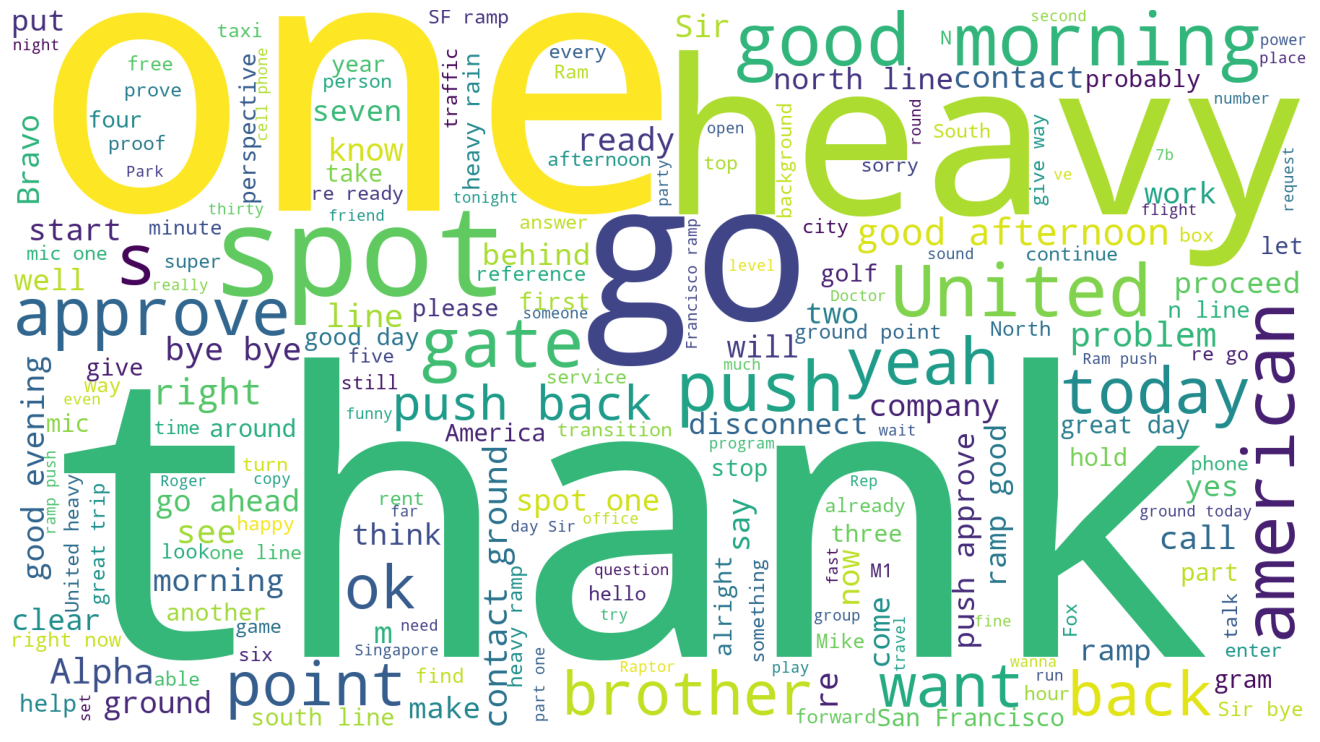

In [39]:
all_words = ' '.join(lemm)
 
wordcloud = WordCloud(width = 1800, height = 1000, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (13,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Noun phrases

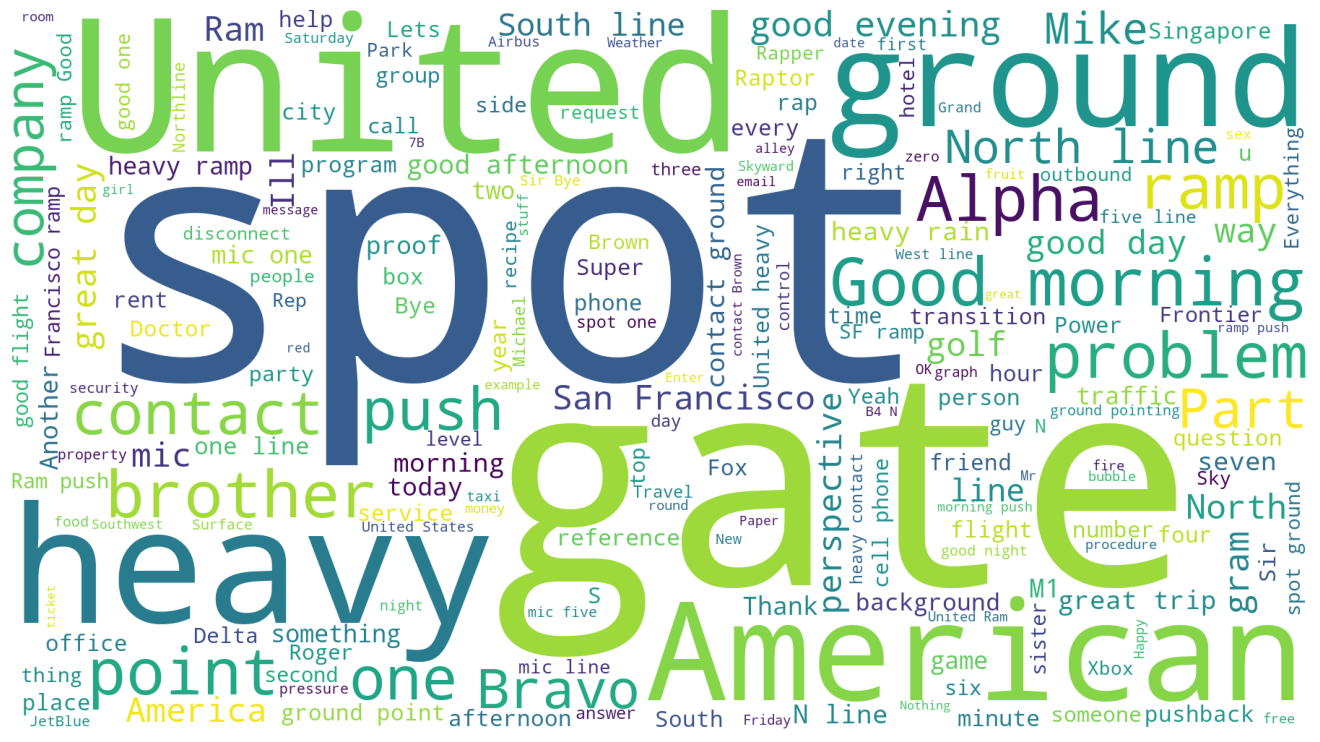

In [40]:
from wordcloud import WordCloud

all_words = ' '.join(noun_chunks)
 
wordcloud = WordCloud(width = 1800, height = 1000, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (13,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Verb phrases

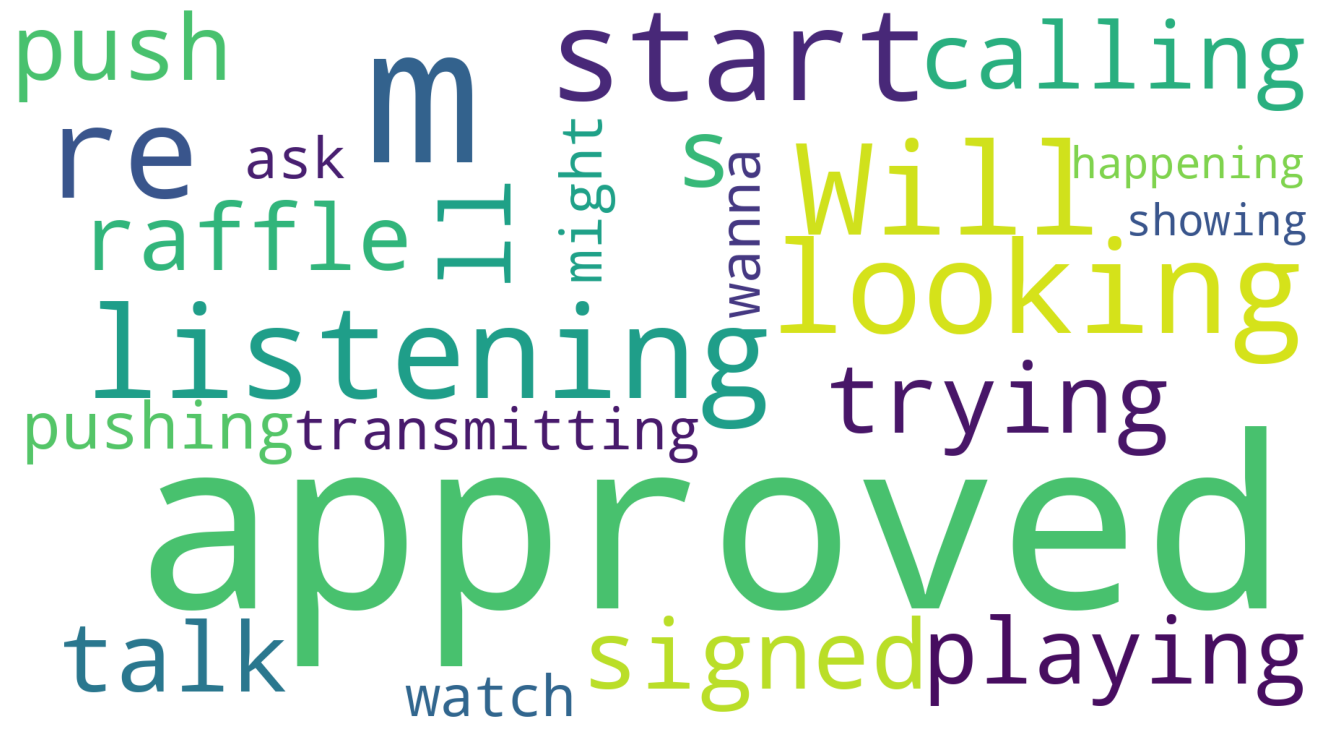

In [41]:
from wordcloud import WordCloud

all_words = ' '.join(verb_chunks)
 
wordcloud = WordCloud(width = 1800, height = 1000, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (13,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Manual review

In [42]:
df1 = data.iloc[:50,[6]]
df1

,text
0,Hey.
1,"So yeah, you're right. I was listening to grou..."
2,Right?
3,"Yeah, but."
4,So you'll get to listen to it.
5,"Oh, it only does it only."
6,"Ah, I see."
7,Yeah.
8,I see I see.
9,Wow.


### Key words:
- Air India
- deplane
- Heavy request access
- Rapper Piles 

In [43]:
df2 = data.iloc[51:100,[6]]
df2

,text
51,Air Mexico 608 ramp.
52,You're signed out for four.
53,Enter spot one.
54,And hold the spot 3.
55,At her
56,Hold on.
57,There are many good curator.
58,Raptor Flight 20 eighties racist.
59,420 spot two and graph.
60,About 2 grams.


### Key words:
- Air Mexico
- Enter spot
- Hold spot
- Spot 1, 2, (3, 4, 5, 6, ...)
- ramps
- Push approved
- America
- United
- Heavies (coming in)

In [44]:
df3 = data.iloc[101:150,[6]]
df3

,text
101,Her to 2035 is spot one in ground. Take care.
102,AutoZone
103,Keep it up.
104,Please pick up in about an hour.
105,They ramp up about 597 is also outside counter...
106,597 rampant spot. One of B25.
107,I want the Bible 25.500.
108,Process until your first.
109,Here.
110,That's fine.


### Key words:
- Frontier
- Push approved
- Ramp good
- 

In [45]:
df4 = data.iloc[151:200,[6]]
df4

,text
151,Put the profile doors on my Flight Dynasty Phi...
152,Thank you and I'm very sad.
153,609 spot two aground point today.
154,Fuck you underground.
155,After the fact.
156,Because you're free.
157,3003 Spot 2 ground one to 1.8 today.
158,What do you want in Tennessee?
159,Right now there is an alphabetic golfer.
160,2280 ramp a spot 1B27.


### Key words:
- Spot 2
- Ramp
- Push approved
- Heavy contact

In [46]:
df5 = data.iloc[201:250,[6]]
df5

,text
201,Stop.
202,At 8:16 you're transmitting rappers the office...
203,25
204,That is something too heavy ramp B5 South. One...
205,Brother
206,Alright.
207,Morning.
208,"Barber, 20 Ram good morning, Chris approved by..."
209,Push my 3 American plate.
210,"For rent back in the day, he probably thinks w..."


### Key words
- Heavy ramp
- Ramp approved

# Future Work

### Re-analysis
- Only analyze data with confidence at and above mean (0.75)

### Create custom dictionary:
- Adjective: Good, heavy
- Noun: Ramp, spot
- Proper nouns: All airline names
- Verbs: Approved, push

### Frequency distribution:
- Airline names: Air India, Air Mexico, American, JetBlue, Singapore, Southwest, Swiss, United ...
- Actions: Push approved, Spot [Number]
- Alerts: 5 to 10 seconds, Approach problems, Heavy ramp, heavy rain, heavy wrecker, Immediate departure
- Status: Ramp good

### Create dashboard:
- Status update: Push [ramp number], Ramp [Number] good, Ramp [Number] approved 
- Alerts: Ramp [Number] heavy